In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
csv = pd.read_csv('../output/result_300_150step_04ovlp.csv')

In [3]:
IMAGES_PATH = '/home/wences/Documents/src/images/images/'
PROJECTIONS_PATH = '../output/300_150step_04ovlp/projections/'
MASKS_PATH = '../output/300_150step_04ovlp/masks/'
ARRAYS_PATH = '../output/300_150step_04ovlp/vote_arrays/'
BINARY_MASK_PATH = '../output/300_150step_04ovlp/binary_masks/'

In [4]:
positive_patches = csv.loc[csv['svm_result'] > 0.5,:]

In [5]:
list_positive_images = positive_patches['image_name'].unique()

In [6]:
list_positive_images

array(['0766.jpg', '0485.jpg', '0674.jpg', '0417.jpg', '0136.jpg',
       '0570.jpg', '0119.jpg', '0595.jpg', '0758.jpg', '0479.jpg',
       '0330.jpg', '0379.jpg', '0443.jpg', '0025.jpg', '0678.jpg',
       '0547.jpg', '0122.jpg', '0465.jpg', '0163.jpg', '0476.jpg',
       '0763.jpg', '0067.jpg', '0771.jpg', '0714.jpg', '0106.jpg',
       '0440.jpg', '0468.jpg', '0688.jpg', '0049.jpg', '0010.jpg',
       '0061.jpg', '0666.jpg', '0323.jpg', '0058.jpg', '0429.jpg',
       '0624.jpg', '0213.jpg', '0487.jpg', '0021.jpg', '0644.jpg',
       '0647.jpg', '0150.jpg', '0621.jpg', '0594.jpg', '0175.jpg',
       '0110.jpg', '0491.jpg', '0669.jpg', '0381.jpg', '0577.jpg',
       '0584.jpg', '0062.jpg', '0733.jpg', '0684.jpg', '0336.jpg',
       '0480.jpg', '0304.jpg', '0378.jpg', '0059.jpg', '0083.jpg',
       '0191.jpg', '0037.jpg', '0377.jpg', '0617.jpg', '0527.jpg',
       '0071.jpg', '0043.jpg', '0018.jpg', '0585.jpg', '0687.jpg',
       '0540.jpg', '0001.jpg', '0174.jpg', '0103.jpg', '0076.j

In [14]:
csv.loc[csv['image_name'] == '0321.jpg']['svm_result']

count    925.000000
mean       0.000110
std        0.001219
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.032555
Name: svm_result, dtype: float64

In [6]:
for image_name in list_positive_images:
    patches_from_image = positive_patches.loc[positive_patches['image_name'] == image_name,:]
    img = cv2.cvtColor(cv2.imread(IMAGES_PATH + image_name), cv2.COLOR_BGR2RGB)
    for idx, row in patches_from_image.iterrows():
        cv2.rectangle(img,(row['top_left_corner_y'],row['top_left_corner_x']),(row['top_left_corner_y']+300,row['top_left_corner_x']+300),(0,255,0),int(row['svm_result']*35))
    cv2.imwrite(PROJECTIONS_PATH + 'sw_'+ image_name, img)

In [6]:
for image_name in list_positive_images:
    patches_from_image = positive_patches.loc[positive_patches['image_name'] == image_name,:]
    img = cv2.cvtColor(cv2.imread(IMAGES_PATH + image_name), cv2.COLOR_BGR2RGB)
    mask = np.zeros_like(img[:,:,0])
    for idx, row in patches_from_image.iterrows():
        x = row['top_left_corner_x']
        y = row['top_left_corner_y']
        mask[x:x+300,y:y+300] += 1
        #cv2.rectangle(img,(row['top_left_corner_x'],row['top_left_corner_y']),(row['top_left_corner_x']+300,row['top_left_corner_y']+300),(0,255,0),20)
    cv2.imwrite(MASKS_PATH + 'mask_sw_'+ image_name, cv2.normalize(mask,None,0,255,cv2.NORM_MINMAX))

In [9]:
for image_name in list_positive_images:
    patches_from_image = positive_patches.loc[positive_patches['image_name'] == image_name,:]
    img = cv2.cvtColor(cv2.imread(IMAGES_PATH + image_name), cv2.COLOR_BGR2RGB)
    mask = np.zeros_like(img[:,:,0])
    for idx, row in patches_from_image.iterrows():
        x = row['top_left_corner_x']
        y = row['top_left_corner_y']
        mask[x:x+300,y:y+300] += 1
    np.save(ARRAYS_PATH + 'mask_sw_'+ image_name[0:4]+'.npy', mask)

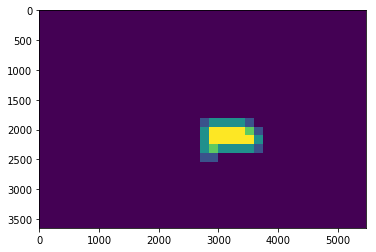

In [10]:
plt.imshow(mask)